<a href="https://colab.research.google.com/github/NIUCompPhys/Spring2024/blob/main/g_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
N0 = 2e7
lifetime = 64.4e-6
phase = 1.0
omega_over2pi = 229077.81
omega = omega_over2pi*np.pi*2
print(omega)
def func(t,N,w,d):
  return N*np.exp(-t/lifetime)*(1+np.cos(w*t+d))

tmin = 0
tmax = 500e-6
nbin = 8000

ts = np.linspace(tmin,tmax,nbin)
vals = np.array([])
for t in ts:
  val = func(t,N0,omega,phase)
  fluctuated = np.random.poisson(val,1)
  vals = np.append(vals,fluctuated[0])

from google.colab import drive,files
drive.mount('/content/drive')
np.savetxt('g-2.txt',np.column_stack((ts,vals)),header='time(seconds) Ndecays')
files.download('g-2.txt')

1439338.3299928769
Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving g-2.txt to g-2 (1).txt


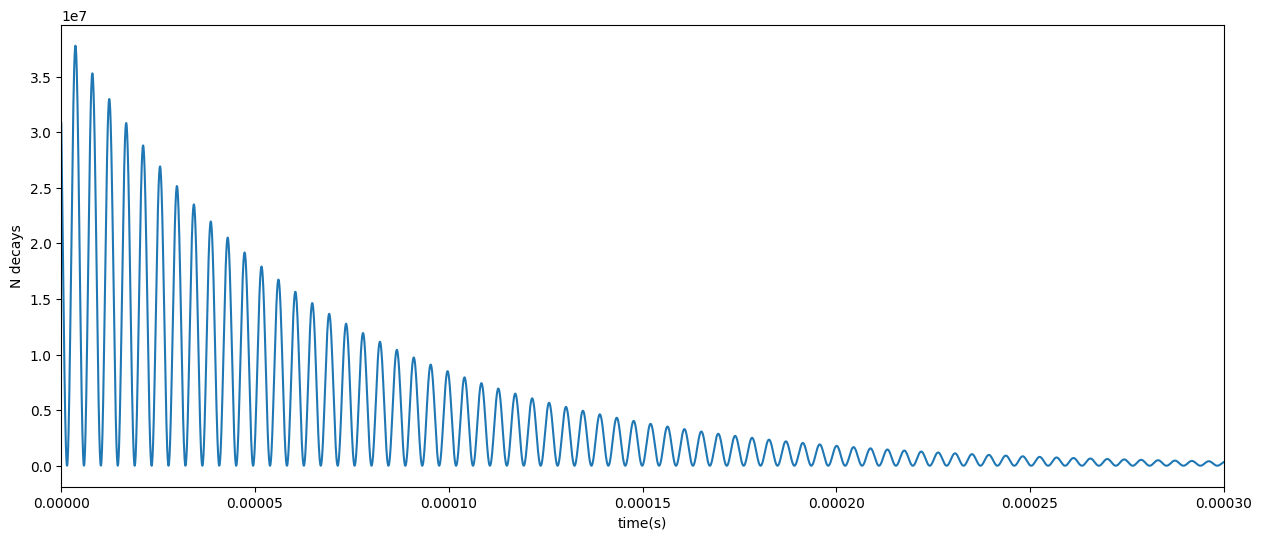

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()### g-2 file
all = np.genfromtxt('g-2.txt')
ts = all[:,0]
vals = all[:,1]
plt.figure(figsize=(15,6))
plt.plot(ts,vals)
plt.xlabel('time(s)')
plt.ylabel('N decays')
plt.xlim(0,0.0003)
plt.show()

Function: N0*exp^{-t/tau}*(1+cos(ωt+δ))

We have 3 parameters, N0, omega and phase

E = sum_i (y_i-N0*e^(-t/tau)*(1+cos(ω*t+δ)))^2/N0*exp^{-t/tau}*(1+cos(ωt+δ))

∂E / ∂N0 = sum_i -2*(y_i-N0*e^(-t/tau)*(1+cos(ωt+δ)))*(e^(-t/tau)*(1+cos(ωt+δ)))/N0*exp^{-t/tau}*(1+cos(ωt+δ)) - (y_i-N0*e^(-t/tau)*(1+cos(ω*t+δ)))^2/(N0*exp^{-t/tau}*(1+cos(ωt+δ)))^2 * exp^{-t/tau}*(1+cos(ωt+δ))

∂E / ∂ω = sum_i 2*(y_i-N0*e^(-t/tau)*(1+cos(ωt+δ)))*(N0*t*e^(-t/tau)*(sin(ωt+δ))) + (y_i-N0*e^(-t/tau)*(1+cos(ω*t+δ)))^2/(N0*exp^{-t/tau}*(1+cos(ωt+δ)))^2 * N0*t*exp^{-t/tau}*(sin(ωt+δ))

∂E / ∂δ = sum_i 2*(y_i-N0*e^(-t/tau)*(1+cos(ωt+δ)))*(N0*t*e^(-t/tau)*(sin(ωt+δ))) + (y_i-N0*e^(-t/tau)*(1+cos(ω*t+δ)))^2/(N0*exp^{-t/tau}*(1+cos(ωt+δ)))^2 * N0*exp^{-t/tau}*(sin(ωt+δ))





In [ ]:
from numpy import sqrt

def calcChi2(xs,ys,params,reduced = True): ### params = N0, omega, phase
  chi2 = 0
  for x,y in zip(xs,ys):
    expected = func(x,params[0],params[1],params[2])
    if(expected < 1e-6): chi2 += 9 ### placeholder
    else: chi2 += ((y-expected)**2)/expected
  if (reduced): return chi2/len(xs)
  else: return chi2

def gradient2(xs,ys,params,hs):
  gradients = []
  for var in range(len(hs)):
    tempParams = params
    tempParams[var] = params[var] + hs[var]/2
    up = calcChi2(xs,ys,tempParams,False)
    tempParams[var] = params[var] - hs[var]/2
    down = calcChi2(xs,ys,tempParams,False)
    gradients.append((up-down)/hs[var])
  return gradients

def gradient(xs,ys,params):
  gradN0 = 0
  gradOmega = 0
  gradDelta = 0
  for x,y in zip(xs,ys):
    thefunc = func(x,params[0],params[1],params[2])
    denom = thefunc
    if (denom < 1): denom = 1
    gradN0 += (np.exp(-x/lifetime)*(1+np.cos(params[1]*x+params[2])))*(1-y*y/(denom*denom))
    gradOmega += -(params[0]*x*np.exp(-x/lifetime)*np.sin(params[1]*x+params[2]))*(1-y*y/(denom*denom))
    gradDelta += -(params[0]*np.exp(-x/lifetime)*np.sin(params[1]*x+params[2]))*(1-y*y/(denom*denom))
  return gradN0,gradOmega,gradDelta

params = [N0,omega,phase]
chi2 = calcChi2(ts,vals,params,True)

[20000000.0, 1439000.0, 1.0] 6187.151263078986
0 6187.151263078986 [20000000.0, 1439000.0, 1.0]
100 4.129165817901931 [20000000.0, 1439329.1457278852, 1.0]
200 1.0236025444270904 [20000000.0, 1439336.9661270345, 1.0]
300 0.9850036830872166 [20000000.0, 1439337.976328713, 1.0]
400 0.982224798421309 [20000000.0, 1439338.2052873012, 1.0]
500 0.9817946748758557 [20000000.0, 1439338.2801632585, 1.0]
600 0.9816852084465146 [20000000.0, 1439338.3113184434, 1.0]
700 0.9816466307464297 [20000000.0, 1439338.3265166653, 1.0]
800 0.9816297804209364 [20000000.0, 1439338.3347557166, 1.0]
900 0.9816212949503658 [20000000.0, 1439338.339547018, 1.0]


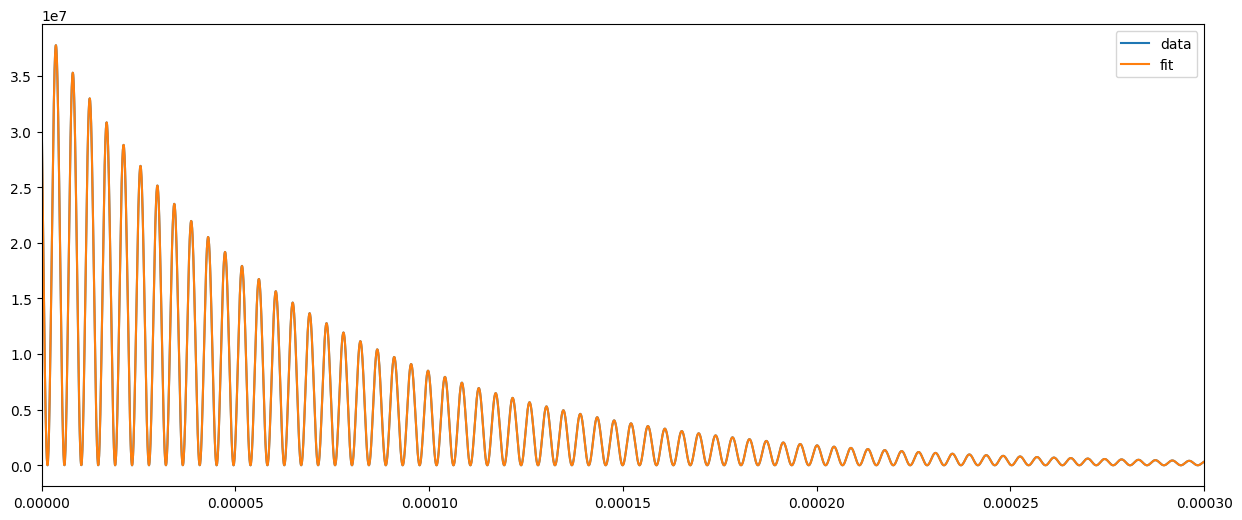

[20000000.0, 1439338.3424668873, 1.0] 0.9816165975513783


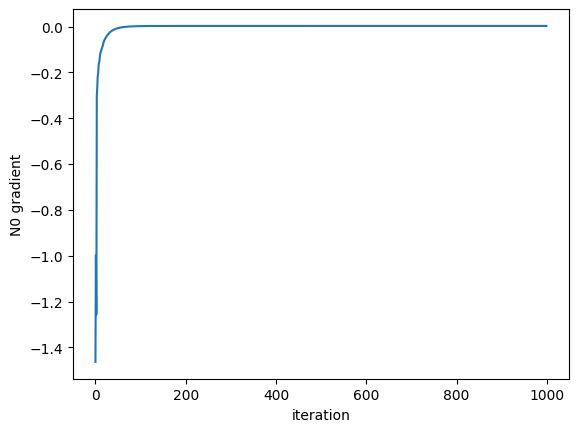

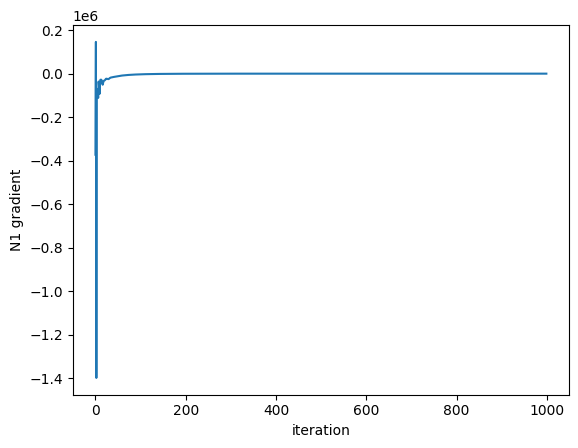

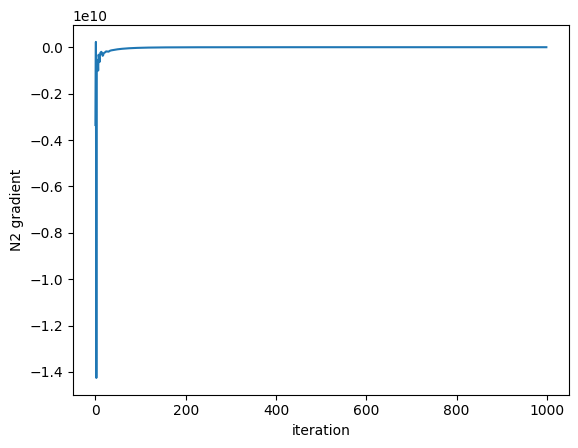

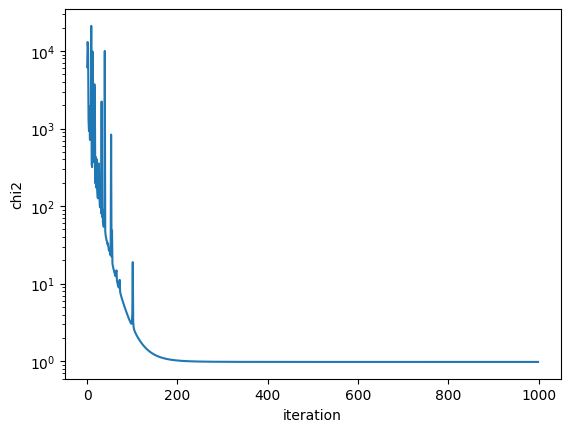

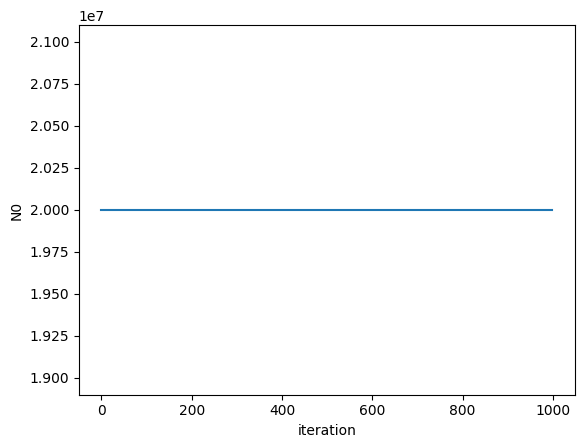

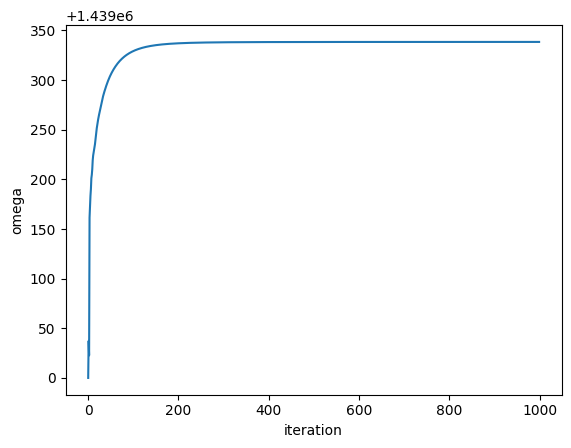

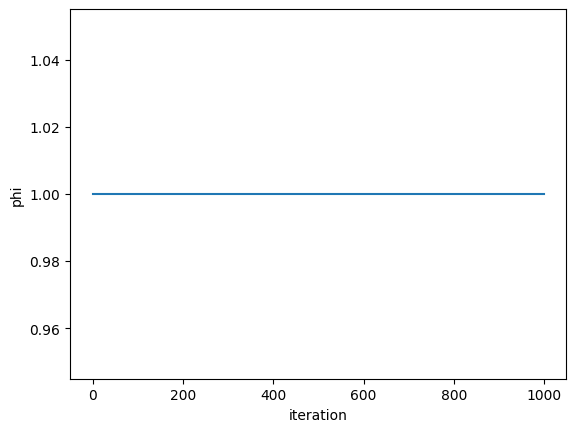

In [ ]:
params = [2.0e7, 1.439e6, 1.0]
#params = [2.0e7, 1439337.1142358, 1.0] ### true values

print(params,calcChi2(ts,vals,params))

lr0 = 1e2
lr1 = 1e-4
lr2 = 1e-17
decay = 0.996

chi2s = []
N0s = []
omegas = []
phis = []
gs0 = []
gs1 = []
gs2 = []
for iter in range(1000):
  chi2 = calcChi2(ts,vals,params)
  if (iter%100 == 0): print(iter,chi2,params)
  gradients = gradient(ts,vals,params)
  chi2s.append(chi2)
  N0s.append(params[0])
  omegas.append(params[1])
  phis.append(params[2])
  gs0.append(gradients[0])
  gs1.append(gradients[1])
  gs2.append(gradients[2])

  #params[0] = params[0] - lr0*gradients[0]
  params[1] = params[1] - lr1*gradients[1]
  #params[2] = params[2] - lr2*gradients[2]

  lr0 = lr0*decay
  lr1 = lr1*decay
  lr2 = lr2*decay


plt.figure(figsize=(15,6))
plt.plot(ts,vals, label="data")
plt.plot(ts,func(ts, params[0],params[1],params[2]),label="fit")
plt.legend()
plt.xlim(0,0.0003)
plt.show()
print(params,calcChi2(ts,vals,params))


plt.plot(gs0)
plt.xlabel("iteration")
plt.ylabel("N0 gradient")
plt.show()

plt.plot(gs1)
plt.xlabel("iteration")
plt.ylabel("N1 gradient")
plt.show()

plt.plot(gs2)
plt.xlabel("iteration")
plt.ylabel("N2 gradient")
plt.show()

plt.plot(chi2s)
plt.xlabel("iteration")
plt.ylabel("chi2")
plt.yscale("log")
plt.show()

plt.plot(N0s)
plt.xlabel("iteration")
plt.ylabel("N0")
plt.show()

plt.plot(omegas)
plt.xlabel("iteration")
plt.ylabel("omega")
plt.show()

plt.plot(phis)
plt.xlabel("iteration")
plt.ylabel("phi")
plt.show()
